In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv') 


In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train.shape 

(891, 12)

In [16]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

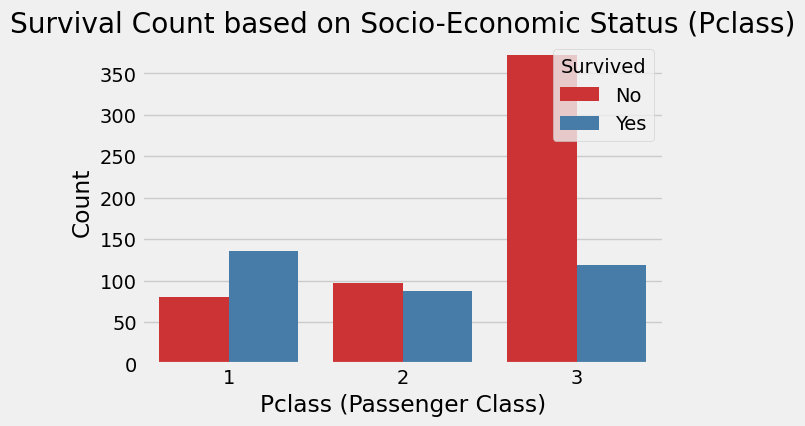

In [24]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set1')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

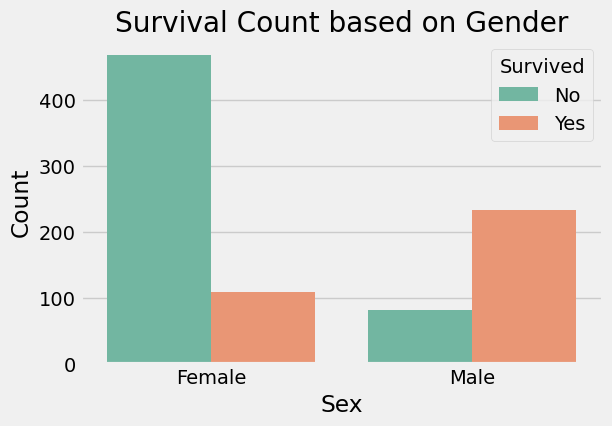

In [25]:
# Visualizing survival based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set2')
plt.title('Survival Count based on Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

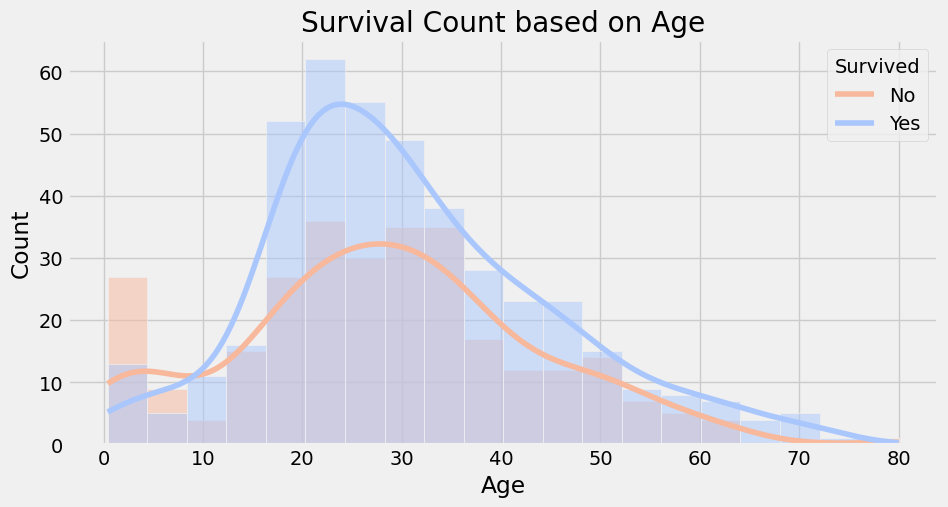

In [26]:
# Visualizing survival based on age
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, palette='coolwarm')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

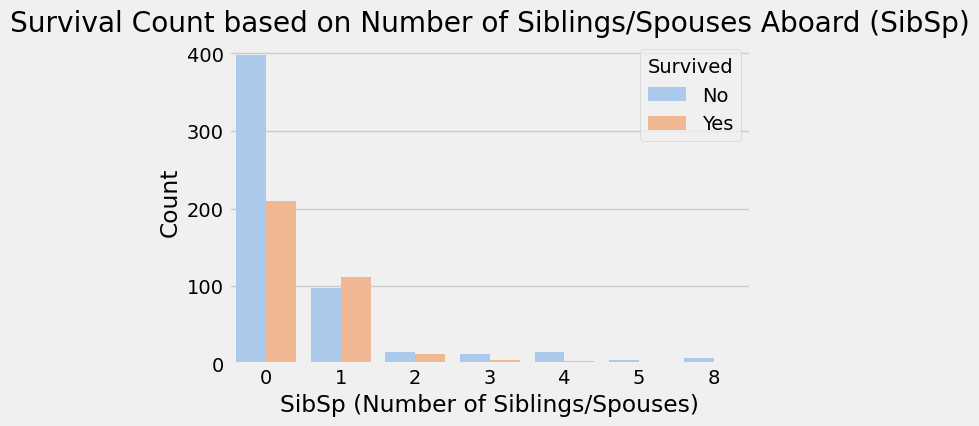

In [27]:
# Visualizing survival based on number of siblings/spouses aboard (SibSp)
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=train_data, palette='pastel')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

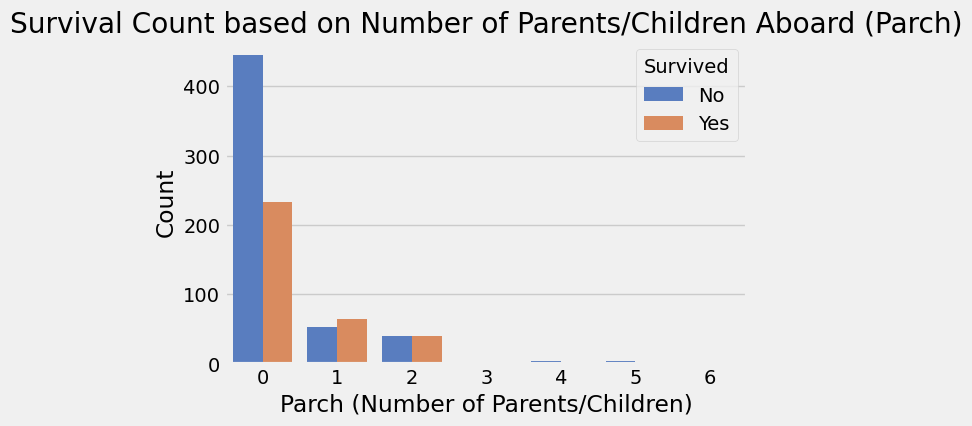

In [28]:
# Visualizing survival based on number of parents/children aboard (Parch)
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='muted')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [29]:
# Drop columns that are not likely to be useful for prediction
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [31]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [32]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [33]:
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

In [34]:
# Separate features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [35]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [37]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predict on the validation set
y_pred = model.predict(X_val)

In [39]:
# Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8212290502793296


In [40]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

[[92 13]
 [19 55]]


In [44]:
predictions = model.predict(test_data)
print(predictions)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [46]:
# Create a DataFrame to store the predictions and save it as a CSV file
prediction_data = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Survived': predictions})
prediction_data.to_csv('titanic_predictions.csv', index=False)
print(prediction_data)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
